In [1]:
# Easier to make graphs and print computations here

In [2]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from scipy import stats

svm_ratings = genfromtxt('CS_475_Final_Project\code\datasets\svm_new_ratings.csv', delimiter=',')
original_ratings = genfromtxt('CS_475_Final_Project\code\datasets\original_amazon_ratings.csv', delimiter=',')
product_categories = genfromtxt('CS_475_Final_Project\code\datasets\product_categories.csv', delimiter='|', dtype=str)

Text(0, 0.5, 'Count')

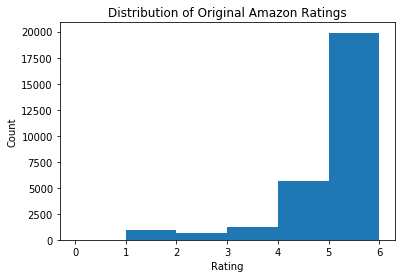

In [3]:
plt.hist(original_ratings, bins=[0,1,2,3,4,5,6])
plt.title('Distribution of Original Amazon Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

In [4]:
print('5 Star Ratings:', np.count_nonzero(original_ratings==5))
print('4 Star Ratings:', np.count_nonzero(original_ratings==4))
print('3 Star Ratings:', np.count_nonzero(original_ratings==3))
print('2 Star Ratings:', np.count_nonzero(original_ratings==2))
print('1 Star Ratings:', np.count_nonzero(original_ratings==1))

5 Star Ratings: 19897
4 Star Ratings: 5648
3 Star Ratings: 1206
2 Star Ratings: 616
1 Star Ratings: 965


In [ ]:
# SVM Rating Investigation

Text(0, 0.5, 'Count')

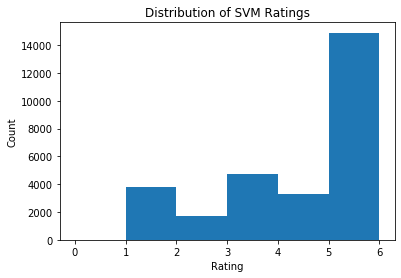

In [5]:
plt.hist(svm_ratings, bins=[0,1,2,3,4,5,6])
plt.title('Distribution of SVM Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

In [6]:
print('5 Star Ratings:', np.count_nonzero(svm_ratings==5))
print('4 Star Ratings:', np.count_nonzero(svm_ratings==4))
print('3 Star Ratings:', np.count_nonzero(svm_ratings==3))
print('2 Star Ratings:', np.count_nonzero(svm_ratings==2))
print('1 Star Ratings:', np.count_nonzero(svm_ratings==1))

5 Star Ratings: 14893
4 Star Ratings: 3266
3 Star Ratings: 4723
2 Star Ratings: 1686
1 Star Ratings: 3764


In [7]:
# change metrics for all ratings
change = svm_ratings - original_ratings # gives array of amount each rating changed by
print('Mean Change:', np.mean(change)) # overall mean amout reviews were changed by
print('Median Change:', np.median(change))
print('Standard Deviation of Change:', np.std(change))

Mean Change: -0.6726669490328957
Median Change: 0.0
Standard Deviation of Change: 1.4872310919814045


In [8]:
# change metrics for each rating class (1-5)
original_five_ratings = original_ratings[np.where(original_ratings==5)]
svm_five_ratings = svm_ratings[np.where(original_ratings==5)]
change_five_ratings = svm_five_ratings - original_five_ratings

original_four_ratings = original_ratings[np.where(original_ratings==4)]
svm_four_ratings = svm_ratings[np.where(original_ratings==4)]
change_four_ratings = svm_four_ratings - original_four_ratings

original_three_ratings = original_ratings[np.where(original_ratings==3)]
svm_three_ratings = svm_ratings[np.where(original_ratings==3)]
change_three_ratings = svm_three_ratings - original_three_ratings

original_two_ratings = original_ratings[np.where(original_ratings==2)]
svm_two_ratings = svm_ratings[np.where(original_ratings==2)]
change_two_ratings = svm_two_ratings - original_two_ratings

original_one_ratings = original_ratings[np.where(original_ratings==1)]
svm_one_ratings = svm_ratings[np.where(original_ratings==1)]
change_one_ratings = svm_one_ratings - original_one_ratings

In [9]:
# find stats for each rating class
print('5 Mean Change:', np.mean(change_five_ratings))
print('5 Median Change:', np.median(change_five_ratings))
print('5 Standard Deviation of Change:', np.std(change_five_ratings))
print('')
print('4 Mean Change:', np.mean(change_four_ratings))
print('4 Median Change:', np.median(change_four_ratings))
print('4 Standard Deviation of Change:', np.std(change_four_ratings))
print('')
print('3 Mean Change:', np.mean(change_three_ratings))
print('3 Median Change:', np.median(change_three_ratings))
print('3 Standard Deviation of Change:', np.std(change_three_ratings))
print('')
print('2 Mean Change:', np.mean(change_two_ratings))
print('2 Median Change:', np.median(change_two_ratings))
print('2 Standard Deviation of Change:', np.std(change_two_ratings))
print('')
print('1 Mean Change:', np.mean(change_one_ratings))
print('1 Median Change:', np.median(change_one_ratings))
print('1 Standard Deviation of Change:', np.std(change_one_ratings))

5 Mean Change: -0.9912047042267679
5 Median Change: 0.0
5 Standard Deviation of Change: 1.3600363932503632

4 Mean Change: -0.15846317280453256
4 Median Change: 1.0
4 Standard Deviation of Change: 1.4215295858245918

3 Mean Change: 0.10945273631840796
3 Median Change: 0.0
3 Standard Deviation of Change: 1.591736600481295

2 Mean Change: 0.6233766233766234
2 Median Change: 0.0
2 Standard Deviation of Change: 1.5100439577239888

1 Mean Change: 1.0808290155440414
1 Median Change: 1.0
1 Standard Deviation of Change: 1.3419092950928329


In [10]:
# find ratio of up to down for each rating class
print('Interpreted as: Given Rating was X, Probability it was Inc/Dec/Unc is ...')
print('')
print('Number of Decreased 5 Star Ratings:', len(np.where(change_five_ratings<0)[0]), '=', (len(np.where(change_five_ratings<0)[0])/len(change_five_ratings))*100, '%')
print('Number of Unchanged 5 Star Ratings:', len(np.where(change_five_ratings==0)[0]), '=',(len(np.where(change_five_ratings==0)[0])/len(change_five_ratings))*100, '%')# no > 0 class here as 5 ratings cant go up
print('')
print('Number of Increased 4 Star Ratings:', len(np.where(change_four_ratings>0)[0]), '=',(len(np.where(change_four_ratings>0)[0])/len(change_four_ratings))*100, '%')
print('Number of Decreased 4 Star Ratings:', len(np.where(change_four_ratings<0)[0]), '=',(len(np.where(change_four_ratings<0)[0])/len(change_four_ratings))*100, '%')
print('Number of Unchanged 4 Star Ratings:', len(np.where(change_four_ratings==0)[0]), '=',(len(np.where(change_four_ratings==0)[0])/len(change_four_ratings))*100, '%')
print('')
print('Number of Increased 3 Star Ratings:', len(np.where(change_three_ratings>0)[0]), '=',(len(np.where(change_three_ratings>0)[0])/len(change_three_ratings))*100, '%')
print('Number of Decreased 3 Star Ratings:', len(np.where(change_three_ratings<0)[0]), '=',(len(np.where(change_three_ratings<0)[0])/len(change_three_ratings))*100, '%')
print('Number of Unchanged 3 Star Ratings:', len(np.where(change_three_ratings==0)[0]), '=',(len(np.where(change_three_ratings==0)[0])/len(change_three_ratings))*100, '%')
print('')
print('Number of Increased 2 Star Ratings:', len(np.where(change_two_ratings>0)[0]), '=',(len(np.where(change_two_ratings>0)[0])/len(change_two_ratings))*100, '%')
print('Number of Decreased 2 Star Ratings:', len(np.where(change_two_ratings<0)[0]), '=',(len(np.where(change_two_ratings<0)[0])/len(change_two_ratings))*100, '%')
print('Number of Unchanged 2 Star Ratings:', len(np.where(change_two_ratings==0)[0]), '=',(len(np.where(change_two_ratings==0)[0])/len(change_two_ratings))*100, '%')
print('')
print('Number of Increased 1 Star Ratings:', len(np.where(change_one_ratings>0)[0]),'=', (len(np.where(change_one_ratings>0)[0])/len(change_one_ratings))*100, '%')
print('Number of Unchanged 1 Star Ratings:', len(np.where(change_one_ratings==0)[0]),'=', (len(np.where(change_one_ratings==0)[0])/len(change_one_ratings))*100, '%')

Interpreted as: Given Rating was X, Probability it was Inc/Dec/Unc is ...

Number of Decreased 5 Star Ratings: 8500 = 42.72000804141328 %
Number of Unchanged 5 Star Ratings: 11397 = 57.27999195858672 %

Number of Increased 4 Star Ratings: 2882 = 51.02691218130312 %
Number of Decreased 4 Star Ratings: 2033 = 35.99504249291785 %
Number of Unchanged 4 Star Ratings: 733 = 12.978045325779036 %

Number of Increased 3 Star Ratings: 518 = 42.95190713101161 %
Number of Decreased 3 Star Ratings: 443 = 36.73300165837479 %
Number of Unchanged 3 Star Ratings: 245 = 20.3150912106136 %

Number of Increased 2 Star Ratings: 283 = 45.94155844155844 %
Number of Decreased 2 Star Ratings: 201 = 32.62987012987013 %
Number of Unchanged 2 Star Ratings: 132 = 21.428571428571427 %

Number of Increased 1 Star Ratings: 490 = 50.77720207253886 %
Number of Unchanged 1 Star Ratings: 475 = 49.22279792746114 %


In [11]:
# Look at Rating Change Based on Product Type
print(np.unique(product_categories))
health_indices = np.where(product_categories=='Health & Beauty')
animal_indices = np.where(product_categories=='Animals & Pet Supplies')
electronics_indices = np.where(product_categories=='Electronics')
home_indices = np.where(product_categories=='Home & Garden')
office_indices = np.where(product_categories=='Office Supplies')
toy_indices = np.where(product_categories=='Toys & Games')

health_changes = change[health_indices]
animals_changes = change[animal_indices]
electronic_changes = change[electronics_indices]
home_changes = change[home_indices]
office_changes = change[office_indices]
toy_changes = change[toy_indices]

print('Health Mean Change:', np.mean(health_changes)) # overall mean amout reviews were changed by
print('Health Median Change:', np.median(health_changes))
print('Health Standard Deviation of Change:', np.std(health_changes))
print('')
print('Animal Mean Change:', np.mean(animals_changes)) # overall mean amout reviews were changed by
print('Animal Median Change:', np.median(animals_changes))
print('Animal Standard Deviation of Change:', np.std(animals_changes))
print('')
print('Electronic Mean Change:', np.mean(electronic_changes)) # overall mean amout reviews were changed by
print('Electronic Median Change:', np.median(electronic_changes))
print('Electronic Standard Deviation of Change:', np.std(electronic_changes))
print('')
print('Home Mean Change:', np.mean(home_changes)) # overall mean amout reviews were changed by
print('Home Median Change:', np.median(home_changes))
print('Home Standard Deviation of Change:', np.std(home_changes))
print('')
print('Office Mean Change:', np.mean(office_changes)) # overall mean amout reviews were changed by
print('Office Median Change:', np.median(office_changes))
print('Office Standard Deviation of Change:', np.std(office_changes))
print('')
print('Toy Mean Change:', np.mean(toy_changes)) # overall mean amout reviews were changed by
print('Toy Median Change:', np.median(toy_changes))
print('Toy Standard Deviation of Change:', np.std(toy_changes))

['Animals & Pet Supplies' 'Electronics' 'Health & Beauty' 'Home & Garden'
 'Office Supplies' 'Toys & Games']
Health Mean Change: -0.7552812525888493
Health Median Change: 0.0
Health Standard Deviation of Change: 1.6402762693401296

Animal Mean Change: -1.0
Animal Median Change: -0.5
Animal Standard Deviation of Change: 1.1547005383792515

Electronic Mean Change: -0.6153574954167255
Electronic Median Change: 0.0
Electronic Standard Deviation of Change: 1.3589561250935822

Home Mean Change: -3.0
Home Median Change: -3.0
Home Standard Deviation of Change: 0.0

Office Mean Change: -0.49873417721518987
Office Median Change: 0.0
Office Standard Deviation of Change: 1.2992201819695464

Toy Mean Change: -0.5996420047732697
Toy Median Change: 0.0
Toy Standard Deviation of Change: 1.3736264098524718


In [12]:
# change likelihood given product category
print('Interpreted as: Given Product Category was X, Probability it was Inc/Dec/Unc is ...')
print('')
print('Number of Increased Health Ratings:', len(np.where(health_changes>0)[0]), '=',(len(np.where(health_changes>0)[0])/len(health_changes))*100, '%')
print('Number of Decreased Health Ratings:', len(np.where(health_changes<0)[0]), '=',(len(np.where(health_changes<0)[0])/len(health_changes))*100, '%')
print('Number of Unchanged Health Ratings:', len(np.where(health_changes==0)[0]), '=',(len(np.where(health_changes==0)[0])/len(health_changes))*100, '%')
print('')
print('Number of Increased Animal Ratings:', len(np.where(animals_changes>0)[0]), '=',(len(np.where(animals_changes>0)[0])/len(animals_changes))*100, '%')
print('Number of Decreased Animal Ratings:', len(np.where(animals_changes<0)[0]), '=',(len(np.where(animals_changes<0)[0])/len(animals_changes))*100, '%')
print('Number of Unchanged Animal Ratings:', len(np.where(animals_changes==0)[0]), '=',(len(np.where(animals_changes==0)[0])/len(animals_changes))*100, '%')
print('')
print('Number of Increased Electronic Ratings:', len(np.where(electronic_changes>0)[0]), '=',(len(np.where(electronic_changes>0)[0])/len(electronic_changes))*100, '%')
print('Number of Decreased Electronic Ratings:', len(np.where(electronic_changes<0)[0]), '=',(len(np.where(electronic_changes<0)[0])/len(electronic_changes))*100, '%')
print('Number of Unchanged Electronic Ratings:', len(np.where(electronic_changes==0)[0]), '=',(len(np.where(electronic_changes==0)[0])/len(electronic_changes))*100, '%')
print('')
print('Number of Increased Home Ratings:', len(np.where(home_changes>0)[0]), '=',(len(np.where(home_changes>0)[0])/len(home_changes))*100, '%')
print('Number of Decreased Home Ratings:', len(np.where(home_changes<0)[0]), '=',(len(np.where(home_changes<0)[0])/len(home_changes))*100, '%')
print('Number of Unchanged Home Ratings:', len(np.where(home_changes==0)[0]), '=',(len(np.where(home_changes==0)[0])/len(home_changes))*100, '%')
print('')
print('Number of Increased Office Ratings:', len(np.where(office_changes>0)[0]), '=',(len(np.where(office_changes>0)[0])/len(office_changes))*100, '%')
print('Number of Decreased Office Ratings:', len(np.where(office_changes<0)[0]), '=',(len(np.where(office_changes<0)[0])/len(office_changes))*100, '%')
print('Number of Unchanged Office Ratings:', len(np.where(office_changes==0)[0]), '=',(len(np.where(office_changes==0)[0])/len(office_changes))*100, '%')
print('')
print('Number of Increased Toy Ratings:', len(np.where(toy_changes>0)[0]), '=',(len(np.where(toy_changes>0)[0])/len(toy_changes))*100, '%')
print('Number of Decreased Toy Ratings:', len(np.where(toy_changes<0)[0]), '=',(len(np.where(toy_changes<0)[0])/len(toy_changes))*100, '%')
print('Number of Unchanged Toy Ratings:', len(np.where(toy_changes==0)[0]), '=',(len(np.where(toy_changes==0)[0])/len(toy_changes))*100, '%')

Interpreted as: Given Product Category was X, Probability it was Inc/Dec/Unc is ...

Number of Increased Health Ratings: 1554 = 12.873829840112666 %
Number of Decreased Health Ratings: 4624 = 38.30668544445365 %
Number of Unchanged Health Ratings: 5893 = 48.81948471543369 %

Number of Increased Animal Ratings: 0 = 0.0 %
Number of Decreased Animal Ratings: 3 = 50.0 %
Number of Unchanged Animal Ratings: 3 = 50.0 %

Number of Increased Electronic Ratings: 2276 = 16.048512198561557 %
Number of Decreased Electronic Ratings: 5724 = 40.36102101255112 %
Number of Unchanged Electronic Ratings: 6182 = 43.59046678888732 %

Number of Increased Home Ratings: 0 = 0.0 %
Number of Decreased Home Ratings: 2 = 100.0 %
Number of Unchanged Home Ratings: 0 = 0.0 %

Number of Increased Office Ratings: 71 = 17.974683544303797 %
Number of Decreased Office Ratings: 154 = 38.9873417721519 %
Number of Unchanged Office Ratings: 170 = 43.037974683544306 %

Number of Increased Toy Ratings: 272 = 16.2291169451074 %


In [13]:
# Random Forest Rating Investigation

In [15]:
rf_ratings = genfromtxt(r'CS_475_Final_Project\code\datasets\rf_new_ratings.csv', delimiter=',')

Text(0, 0.5, 'Count')

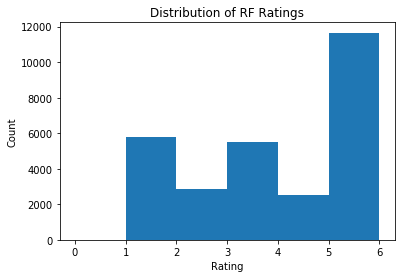

In [18]:
plt.hist(rf_ratings, bins=[0,1,2,3,4,5,6])
plt.title('Distribution of RF Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

In [19]:
print('5 Star Ratings:', np.count_nonzero(rf_ratings==5))
print('4 Star Ratings:', np.count_nonzero(rf_ratings==4))
print('3 Star Ratings:', np.count_nonzero(rf_ratings==3))
print('2 Star Ratings:', np.count_nonzero(rf_ratings==2))
print('1 Star Ratings:', np.count_nonzero(rf_ratings==1))

5 Star Ratings: 11656
4 Star Ratings: 2538
3 Star Ratings: 5513
2 Star Ratings: 2864
1 Star Ratings: 5761


In [20]:
# change metrics for all ratings
change1 = rf_ratings - original_ratings # gives array of amount each rating changed by
print('Mean Change:', np.mean(change1)) # overall mean amout reviews were changed by
print('Median Change:', np.median(change1))
print('Standard Deviation of Change:', np.std(change1))

Mean Change: -1.109416913737117
Median Change: -1.0
Standard Deviation of Change: 1.6173430859314597


In [21]:
# change metrics for each rating class (1-5)
original_five_ratings = original_ratings[np.where(original_ratings==5)]
rf_five_ratings = rf_ratings[np.where(original_ratings==5)]
change_five_ratings1 = rf_five_ratings - original_five_ratings

original_four_ratings = original_ratings[np.where(original_ratings==4)]
rf_four_ratings = rf_ratings[np.where(original_ratings==4)]
change_four_ratings1 = rf_four_ratings - original_four_ratings

original_three_ratings = original_ratings[np.where(original_ratings==3)]
rf_three_ratings = rf_ratings[np.where(original_ratings==3)]
change_three_ratings1 = rf_three_ratings - original_three_ratings

original_two_ratings = original_ratings[np.where(original_ratings==2)]
rf_two_ratings = rf_ratings[np.where(original_ratings==2)]
change_two_ratings1 = rf_two_ratings - original_two_ratings

original_one_ratings = original_ratings[np.where(original_ratings==1)]
rf_one_ratings = rf_ratings[np.where(original_ratings==1)]
change_one_ratings1 = rf_one_ratings - original_one_ratings

In [22]:
# find stats for each rating class
print('5 Mean Change:', np.mean(change_five_ratings1))
print('5 Median Change:', np.median(change_five_ratings1))
print('5 Standard Deviation of Change:', np.std(change_five_ratings1))
print('')
print('4 Mean Change:', np.mean(change_four_ratings1))
print('4 Median Change:', np.median(change_four_ratings1))
print('4 Standard Deviation of Change:', np.std(change_four_ratings1))
print('')
print('3 Mean Change:', np.mean(change_three_ratings1))
print('3 Median Change:', np.median(change_three_ratings1))
print('3 Standard Deviation of Change:', np.std(change_three_ratings1))
print('')
print('2 Mean Change:', np.mean(change_two_ratings1))
print('2 Median Change:', np.median(change_two_ratings1))
print('2 Standard Deviation of Change:', np.std(change_two_ratings1))
print('')
print('1 Mean Change:', np.mean(change_one_ratings1))
print('1 Median Change:', np.median(change_one_ratings1))
print('1 Standard Deviation of Change:', np.std(change_one_ratings1))

5 Mean Change: -1.421721867618234
5 Median Change: -1.0
5 Standard Deviation of Change: 1.5248578050980615

4 Mean Change: -0.6545679886685553
4 Median Change: -1.0
4 Standard Deviation of Change: 1.5580744491209664

3 Mean Change: -0.2728026533996683
3 Median Change: -1.0
3 Standard Deviation of Change: 1.6035946164963193

2 Mean Change: 0.3652597402597403
2 Median Change: 0.0
2 Standard Deviation of Change: 1.5133692942724477

1 Mean Change: 0.6808290155440414
1 Median Change: 0.0
1 Standard Deviation of Change: 1.132513064485632


In [23]:
# find ratio of up to down for each rating class
print('Interpreted as: Given Rating was X, Probability it was Inc/Dec/Unc is ...')
print('')
print('Number of Decreased 5 Star Ratings:', len(np.where(change_five_ratings1<0)[0]), '=', (len(np.where(change_five_ratings1<0)[0])/len(change_five_ratings1))*100, '%')
print('Number of Unchanged 5 Star Ratings:', len(np.where(change_five_ratings1==0)[0]), '=',(len(np.where(change_five_ratings1==0)[0])/len(change_five_ratings1))*100, '%')# no > 0 class here as 5 ratings cant go up
print('')
print('Number of Increased 4 Star Ratings:', len(np.where(change_four_ratings1>0)[0]), '=',(len(np.where(change_four_ratings1>0)[0])/len(change_four_ratings1))*100, '%')
print('Number of Decreased 4 Star Ratings:', len(np.where(change_four_ratings1<0)[0]), '=',(len(np.where(change_four_ratings1<0)[0])/len(change_four_ratings1))*100, '%')
print('Number of Unchanged 4 Star Ratings:', len(np.where(change_four_ratings1==0)[0]), '=',(len(np.where(change_four_ratings1==0)[0])/len(change_four_ratings1))*100, '%')
print('')
print('Number of Increased 3 Star Ratings:', len(np.where(change_three_ratings1>0)[0]), '=',(len(np.where(change_three_ratings1>0)[0])/len(change_three_ratings1))*100, '%')
print('Number of Decreased 3 Star Ratings:', len(np.where(change_three_ratings1<0)[0]), '=',(len(np.where(change_three_ratings1<0)[0])/len(change_three_ratings1))*100, '%')
print('Number of Unchanged 3 Star Ratings:', len(np.where(change_three_ratings1==0)[0]), '=',(len(np.where(change_three_ratings1==0)[0])/len(change_three_ratings1))*100, '%')
print('')
print('Number of Increased 2 Star Ratings:', len(np.where(change_two_ratings1>0)[0]), '=',(len(np.where(change_two_ratings1>0)[0])/len(change_two_ratings1))*100, '%')
print('Number of Decreased 2 Star Ratings:', len(np.where(change_two_ratings1<0)[0]), '=',(len(np.where(change_two_ratings1<0)[0])/len(change_two_ratings1))*100, '%')
print('Number of Unchanged 2 Star Ratings:', len(np.where(change_two_ratings1==0)[0]), '=',(len(np.where(change_two_ratings1==0)[0])/len(change_two_ratings1))*100, '%')
print('')
print('Number of Increased 1 Star Ratings:', len(np.where(change_one_ratings1>0)[0]),'=', (len(np.where(change_one_ratings1>0)[0])/len(change_one_ratings1))*100, '%')
print('Number of Unchanged 1 Star Ratings:', len(np.where(change_one_ratings1==0)[0]),'=', (len(np.where(change_one_ratings1==0)[0])/len(change_one_ratings1))*100, '%')

Interpreted as: Given Rating was X, Probability it was Inc/Dec/Unc is ...

Number of Decreased 5 Star Ratings: 10870 = 54.6313514600191 %
Number of Unchanged 5 Star Ratings: 9027 = 45.368648539980896 %

Number of Increased 4 Star Ratings: 2145 = 37.978045325779036 %
Number of Decreased 4 Star Ratings: 2928 = 51.84135977337111 %
Number of Unchanged 4 Star Ratings: 575 = 10.180594900849858 %

Number of Increased 3 Star Ratings: 388 = 32.172470978441126 %
Number of Decreased 3 Star Ratings: 607 = 50.33167495854063 %
Number of Unchanged 3 Star Ratings: 211 = 17.495854063018243 %

Number of Increased 2 Star Ratings: 228 = 37.01298701298701 %
Number of Decreased 2 Star Ratings: 262 = 42.532467532467535 %
Number of Unchanged 2 Star Ratings: 126 = 20.454545454545457 %

Number of Increased 1 Star Ratings: 338 = 35.02590673575129 %
Number of Unchanged 1 Star Ratings: 627 = 64.9740932642487 %


In [24]:
# Look at Rating Change Based on Product Type
print(np.unique(product_categories))
health_indices = np.where(product_categories=='Health & Beauty')
animal_indices = np.where(product_categories=='Animals & Pet Supplies')
electronics_indices = np.where(product_categories=='Electronics')
home_indices = np.where(product_categories=='Home & Garden')
office_indices = np.where(product_categories=='Office Supplies')
toy_indices = np.where(product_categories=='Toys & Games')

health_changes1 = change1[health_indices]
animals_changes1 = change1[animal_indices]
electronic_changes1 = change1[electronics_indices]
home_changes1 = change1[home_indices]
office_changes1 = change1[office_indices]
toy_changes1 = change1[toy_indices]

print('Health Mean Change:', np.mean(health_changes1)) # overall mean amout reviews were changed by
print('Health Median Change:', np.median(health_changes1))
print('Health Standard Deviation of Change:', np.std(health_changes1))
print('')
print('Animal Mean Change:', np.mean(animals_changes1)) # overall mean amout reviews were changed by
print('Animal Median Change:', np.median(animals_changes1))
print('Animal Standard Deviation of Change:', np.std(animals_changes1))
print('')
print('Electronic Mean Change:', np.mean(electronic_changes1)) # overall mean amout reviews were changed by
print('Electronic Median Change:', np.median(electronic_changes1))
print('Electronic Standard Deviation of Change:', np.std(electronic_changes1))
print('')
print('Home Mean Change:', np.mean(home_changes1)) # overall mean amout reviews were changed by
print('Home Median Change:', np.median(home_changes1))
print('Home Standard Deviation of Change:', np.std(home_changes1))
print('')
print('Office Mean Change:', np.mean(office_changes1)) # overall mean amout reviews were changed by
print('Office Median Change:', np.median(office_changes1))
print('Office Standard Deviation of Change:', np.std(office_changes1))
print('')
print('Toy Mean Change:', np.mean(toy_changes1)) # overall mean amout reviews were changed by
print('Toy Median Change:', np.median(toy_changes1))
print('Toy Standard Deviation of Change:', np.std(toy_changes1))

['Animals & Pet Supplies' 'Electronics' 'Health & Beauty' 'Home & Garden'
 'Office Supplies' 'Toys & Games']
Health Mean Change: -0.9560102725540551
Health Median Change: 0.0
Health Standard Deviation of Change: 1.6801590477910402

Animal Mean Change: -0.8333333333333334
Animal Median Change: -0.5
Animal Standard Deviation of Change: 1.3437096247164249

Electronic Mean Change: -1.2142857142857142
Electronic Median Change: -1.0
Electronic Standard Deviation of Change: 1.554985379801993

Home Mean Change: -3.0
Home Median Change: -3.0
Home Standard Deviation of Change: 0.0

Office Mean Change: -1.139240506329114
Office Median Change: -1.0
Office Standard Deviation of Change: 1.4801144089818508

Toy Mean Change: -1.3186157517899761
Toy Median Change: -1.0
Toy Standard Deviation of Change: 1.6102778463880418


In [25]:
# change likelihood given product category
print('Interpreted as: Given Product Category was X, Probability it was Inc/Dec/Unc is ...')
print('')
print('Number of Increased Health Ratings:', len(np.where(health_changes1>0)[0]), '=',(len(np.where(health_changes1>0)[0])/len(health_changes1))*100, '%')
print('Number of Decreased Health Ratings:', len(np.where(health_changes1<0)[0]), '=',(len(np.where(health_changes1<0)[0])/len(health_changes1))*100, '%')
print('Number of Unchanged Health Ratings:', len(np.where(health_changes1==0)[0]), '=',(len(np.where(health_changes1==0)[0])/len(health_changes1))*100, '%')
print('')
print('Number of Increased Animal Ratings:', len(np.where(animals_changes1>0)[0]), '=',(len(np.where(animals_changes1>0)[0])/len(animals_changes1))*100, '%')
print('Number of Decreased Animal Ratings:', len(np.where(animals_changes1<0)[0]), '=',(len(np.where(animals_changes1<0)[0])/len(animals_changes1))*100, '%')
print('Number of Unchanged Animal Ratings:', len(np.where(animals_changes1==0)[0]), '=',(len(np.where(animals_changes1==0)[0])/len(animals_changes1))*100, '%')
print('')
print('Number of Increased Electronic Ratings:', len(np.where(electronic_changes1>0)[0]), '=',(len(np.where(electronic_changes1>0)[0])/len(electronic_changes1))*100, '%')
print('Number of Decreased Electronic Ratings:', len(np.where(electronic_changes1<0)[0]), '=',(len(np.where(electronic_changes1<0)[0])/len(electronic_changes1))*100, '%')
print('Number of Unchanged Electronic Ratings:', len(np.where(electronic_changes1==0)[0]), '=',(len(np.where(electronic_changes1==0)[0])/len(electronic_changes1))*100, '%')
print('')
print('Number of Increased Home Ratings:', len(np.where(home_changes1>0)[0]), '=',(len(np.where(home_changes1>0)[0])/len(home_changes1))*100, '%')
print('Number of Decreased Home Ratings:', len(np.where(home_changes1<0)[0]), '=',(len(np.where(home_changes1<0)[0])/len(home_changes1))*100, '%')
print('Number of Unchanged Home Ratings:', len(np.where(home_changes1==0)[0]), '=',(len(np.where(home_changes1==0)[0])/len(home_changes1))*100, '%')
print('')
print('Number of Increased Office Ratings:', len(np.where(office_changes1>0)[0]), '=',(len(np.where(office_changes1>0)[0])/len(office_changes1))*100, '%')
print('Number of Decreased Office Ratings:', len(np.where(office_changes1<0)[0]), '=',(len(np.where(office_changes1<0)[0])/len(office_changes1))*100, '%')
print('Number of Unchanged Office Ratings:', len(np.where(office_changes1==0)[0]), '=',(len(np.where(office_changes1==0)[0])/len(office_changes1))*100, '%')
print('')
print('Number of Increased Toy Ratings:', len(np.where(toy_changes1>0)[0]), '=',(len(np.where(toy_changes1>0)[0])/len(toy_changes1))*100, '%')
print('Number of Decreased Toy Ratings:', len(np.where(toy_changes1<0)[0]), '=',(len(np.where(toy_changes1<0)[0])/len(toy_changes1))*100, '%')
print('Number of Unchanged Toy Ratings:', len(np.where(toy_changes1==0)[0]), '=',(len(np.where(toy_changes1==0)[0])/len(toy_changes1))*100, '%')

Interpreted as: Given Product Category was X, Probability it was Inc/Dec/Unc is ...

Number of Increased Health Ratings: 1303 = 10.794466075718665 %
Number of Decreased Health Ratings: 5167 = 42.805070002485294 %
Number of Unchanged Health Ratings: 5601 = 46.400463921796046 %

Number of Increased Animal Ratings: 1 = 16.666666666666664 %
Number of Decreased Animal Ratings: 3 = 50.0 %
Number of Unchanged Animal Ratings: 2 = 33.33333333333333 %

Number of Increased Electronic Ratings: 1583 = 11.162036384148921 %
Number of Decreased Electronic Ratings: 8264 = 58.2710478070794 %
Number of Unchanged Electronic Ratings: 4335 = 30.566915808771682 %

Number of Increased Home Ratings: 0 = 0.0 %
Number of Decreased Home Ratings: 2 = 100.0 %
Number of Unchanged Home Ratings: 0 = 0.0 %

Number of Increased Office Ratings: 41 = 10.379746835443038 %
Number of Decreased Office Ratings: 228 = 57.72151898734177 %
Number of Unchanged Office Ratings: 126 = 31.89873417721519 %

Number of Increased Toy Rati